### GDP growth rate yoy

1/1 - Getting series: 100%|██████████| 1/1 [00:00<00:00,  2.46it/s]
Data has been cached



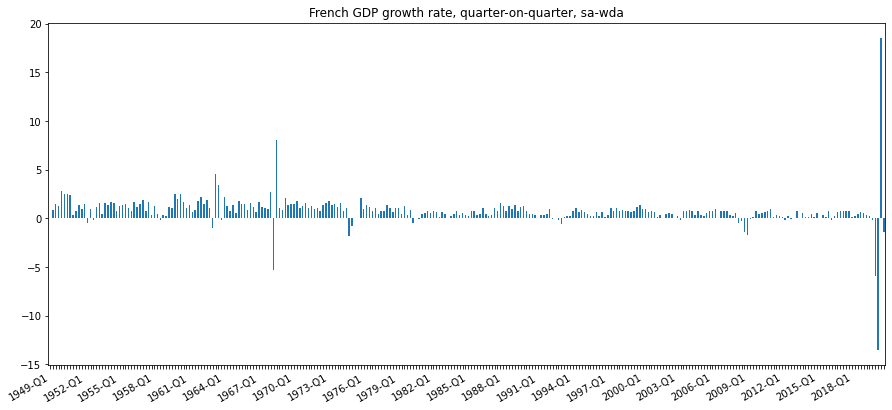

In [1]:

from pynsee.macrodata import * 

import pandas as pd
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt

import os 
# Beware : any change to the keys should be tested in a new python session
# os.environ['insee_key'] = "my_key"
# os.environ['insee_secret'] = "my_secret"

# get series key (idbank), for Gross domestic product balance
id = get_idbank_list("CNT-2014-PIB-EQB-RF")

id = id.loc[(id.FREQ == "T") &
            (id.OPERATION == "PIB") &
            (id.NATURE == "TAUX") &
            (id.CORRECTION == "CVS-CJO")]

data = get_insee_idbank(id.idbank)
data = split_title(df = data, n_split=2)

# define plot
ax = data.plot(kind='bar', x="TIME_PERIOD", stacked=True, y="OBS_VALUE", figsize=(15,7))
#add title
plt.title("French GDP growth rate, quarter-on-quarter, sa-wda")
# customize x-axis tickers
ticklabels = ['']*len(data.TIME_PERIOD)
ticklabels[::12] = [item for item in data.TIME_PERIOD[::12]]
ax.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))
plt.gcf().autofmt_xdate()
#remove legend
ax.get_legend().remove()
#remove x-axistitle
ax.xaxis.label.set_visible(False)

